# **Fundamentos de Data Science Examen: 1**
Analizando la Rotación de Clientes en Telecomunicaciones

**Requisitos**

Tu tarea es limpiar y explorar un dataset para los ejecutivos de una empresa de telecomunicaciones que describe tendencias en la rotación de sus clientes.

El dataset puede ser encontrado aquí ([Dataset Telco](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)).

# **0) Importación de librería y Dataset**

## **0.1) Importando librerias**

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

## **0.2) Importando Dataset**

In [2]:
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
try:
  df = pd.read_csv(file_path)
  print("Dataset cargado exitosamente.")
except FileNotFoundError:
  print(f"Error: El archivo '{file_path}' no se encontró. Por favor, verifica la ruta.")
  exit()

Dataset cargado exitosamente.


## **0.3) Primera impresión del Dataset**

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **1) Limpieza de datos con Python:**

* Identificar y solucionar cualquier valor duplicado.

* Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

* Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).

* Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los
valores faltantes con un marcador adecuado para el tipo de dato.

* Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).

## **1.1) Manejo duplicados**

In [6]:
initial_rows = len(df)
print(f"Se eliminaron {initial_rows - len(df)} filas duplicadas.")
df.drop_duplicates(inplace=True)

Se eliminaron 0 filas duplicadas.


In [7]:
print(f"Se eliminaron {initial_rows - len(df)} filas duplicadas.")

Se eliminaron 0 filas duplicadas.


## **1.2) Corrección de Tipos de Datos**

In [8]:
num_real = df.select_dtypes(include='number').columns.tolist()

num_like = [c for c in df.select_dtypes(include='object')
            if pd.to_numeric(df[c], errors="coerce").notna().mean() > 0.9]

cat_like = [c for c in df.columns if c not in num_real + num_like]

print("Numéricas reales:", num_real)
print("Object numéricas disfrazadas:", num_like)
print("Categóricas:", cat_like)

Numéricas reales: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Object numéricas disfrazadas: ['TotalCharges']
Categóricas: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtypes

dtype('float64')

## **1.3) Inconsistencias Categóricas**

In [10]:
for col in df.select_dtypes(include=['object']).columns:
  print(f"Valores únicos en '{col}': {df[col].unique()}")

Valores únicos en 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Valores únicos en 'gender': ['Female' 'Male']
Valores únicos en 'Partner': ['Yes' 'No']
Valores únicos en 'Dependents': ['No' 'Yes']
Valores únicos en 'PhoneService': ['No' 'Yes']
Valores únicos en 'MultipleLines': ['No phone service' 'No' 'Yes']
Valores únicos en 'InternetService': ['DSL' 'Fiber optic' 'No']
Valores únicos en 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Valores únicos en 'OnlineBackup': ['Yes' 'No' 'No internet service']
Valores únicos en 'DeviceProtection': ['No' 'Yes' 'No internet service']
Valores únicos en 'TechSupport': ['No' 'Yes' 'No internet service']
Valores únicos en 'StreamingTV': ['No' 'Yes' 'No internet service']
Valores únicos en 'StreamingMovies': ['No' 'Yes' 'No internet service']
Valores únicos en 'Contract': ['Month-to-month' 'One year' 'Two year']
Valores únicos en 'PaperlessBilling': ['Yes' 'No']
Valores únicos en 'PaymentMet

## **1.4) Manejo de Valores Faltantes**

In [11]:
print(f"\nValores faltantes:\n{df.isnull().sum()}")


Valores faltantes:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [12]:
df[['TotalCharges', 'tenure', 'MonthlyCharges']]

,TotalCharges,tenure,MonthlyCharges
0,29.85,1,29.85
1,1889.50,34,56.95
2,108.15,2,53.85
3,1840.75,45,42.30
4,151.65,2,70.70
...,...,...,...
7038,1990.50,24,84.80
7039,7362.90,72,103.20
7040,346.45,11,29.60
7041,306.60,4,74.40


In [13]:
df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'], inplace=True)

/tmp/ipython-input-1393675389.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'], inplace=True)


## **1.5) Identificación de Datos Inapropiados**

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
rangos_validos = {
    'tenure': (0, 72),
    'MonthlyCharges': (0, 200),
    'TotalCharges': (0, 10000),
    'SeniorCitizen': (0, 1),
}

encontrados = False
for col, (min_val, max_val) in rangos_validos.items():
  if col in df.columns:
    inapropiados = df[(df[col] < min_val) | (df[col] > max_val)]
    if not inapropiados.empty:
       encontrados = True
       print(f"\nValores inapropiados detectados en '{col}':")
       print(inapropiados[[col]].head())

if not encontrados:
    print("\nNo se identificaron datos inapropiados en las columnas revisadas.")


No se identificaron datos inapropiados en las columnas revisadas.


# **2) Exploración de datos con Python:**

* Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

* Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

In [16]:
sns.set_style("whitegrid")

## **2.1) Visualización Univariada: Distribución de Churn**

/tmp/ipython-input-826433692.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


Text(0, 0.5, 'Cantidad de Clientes')

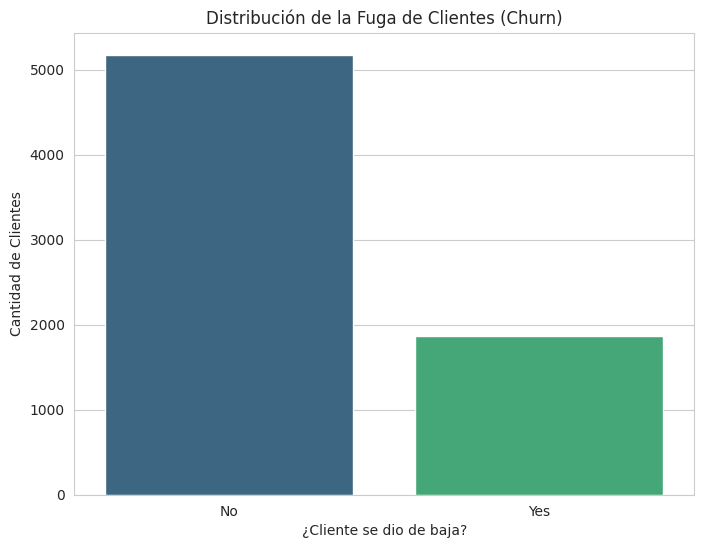

In [17]:
plt.figure(figsize=(8, 6))

sns.countplot(x='Churn', data=df, palette='viridis')

plt.title('Distribución de la Fuga de Clientes (Churn)')
plt.xlabel('¿Cliente se dio de baja?')
plt.ylabel('Cantidad de Clientes')

## **2.2) Visualización Univariada: Distribución de Tipos de Contrato**

/tmp/ipython-input-1471452404.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Contract', data=df, order=df['Contract'].value_counts().index, palette='crest')


Text(0, 0.5, 'Cantidad de Clientes')

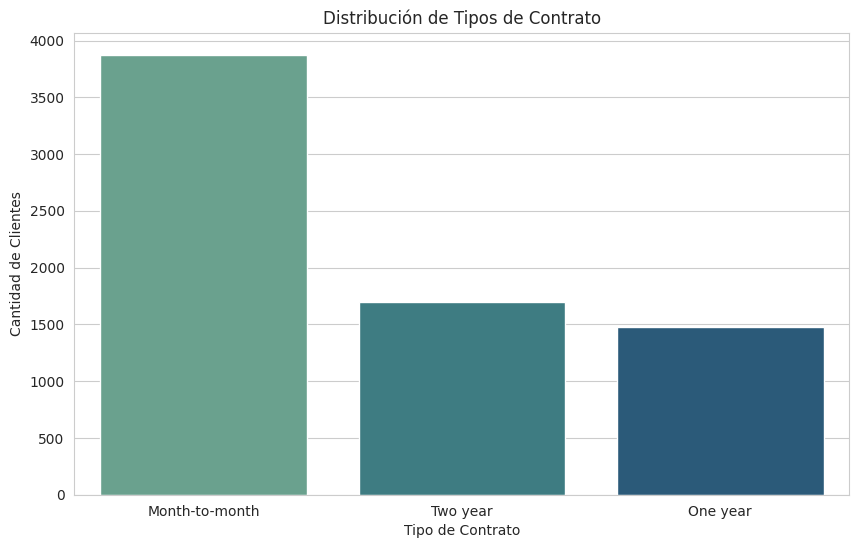

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', data=df, order=df['Contract'].value_counts().index, palette='crest')
plt.title('Distribución de Tipos de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')

## **2.3) Visualización Multivariada: Fuga de Clientes por Tipo de Contrato**

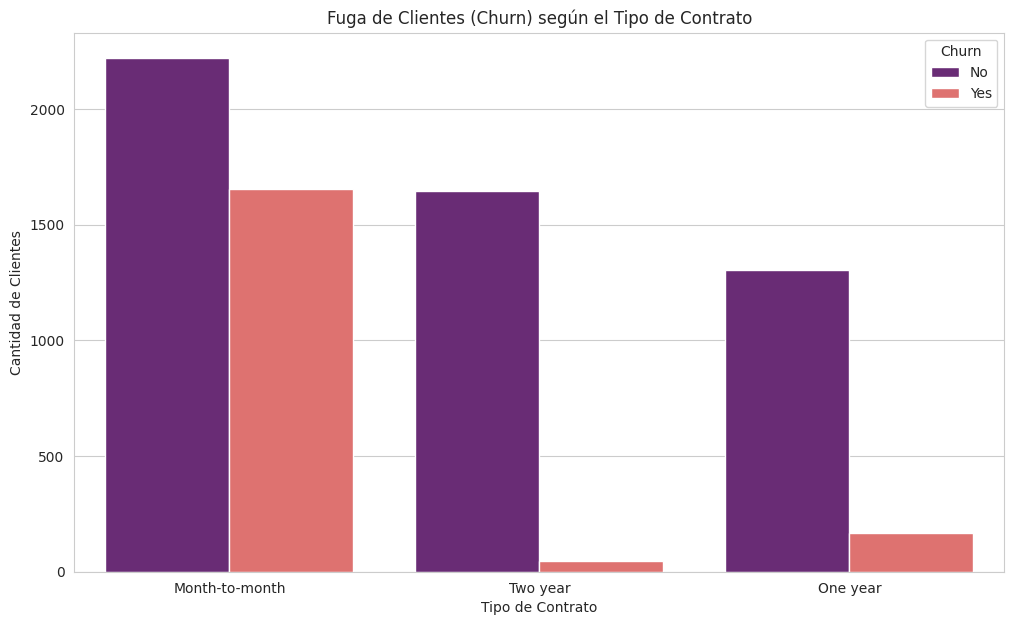

In [19]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Contract', hue='Churn', data=df, order=df['Contract'].value_counts().index, palette='magma')

plt.title('Fuga de Clientes (Churn) según el Tipo de Contrato')

plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')

plt.legend(title='Churn')

## **2.4) Visualización Multivariada: Mapa de Calor con Label Encoder**

In [20]:
from sklearn.preprocessing import LabelEncoder

df_label_encoded = df.copy()

le = LabelEncoder()

for column in df_label_encoded.columns:
   if df_label_encoded[column].dtype == 'object':
        df_label_encoded[column] = le.fit_transform(df_label_encoded[column])

In [21]:
df_label_encoded

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


Text(0.5, 1.0, 'Mapa de Calor de Correlación con Valores')

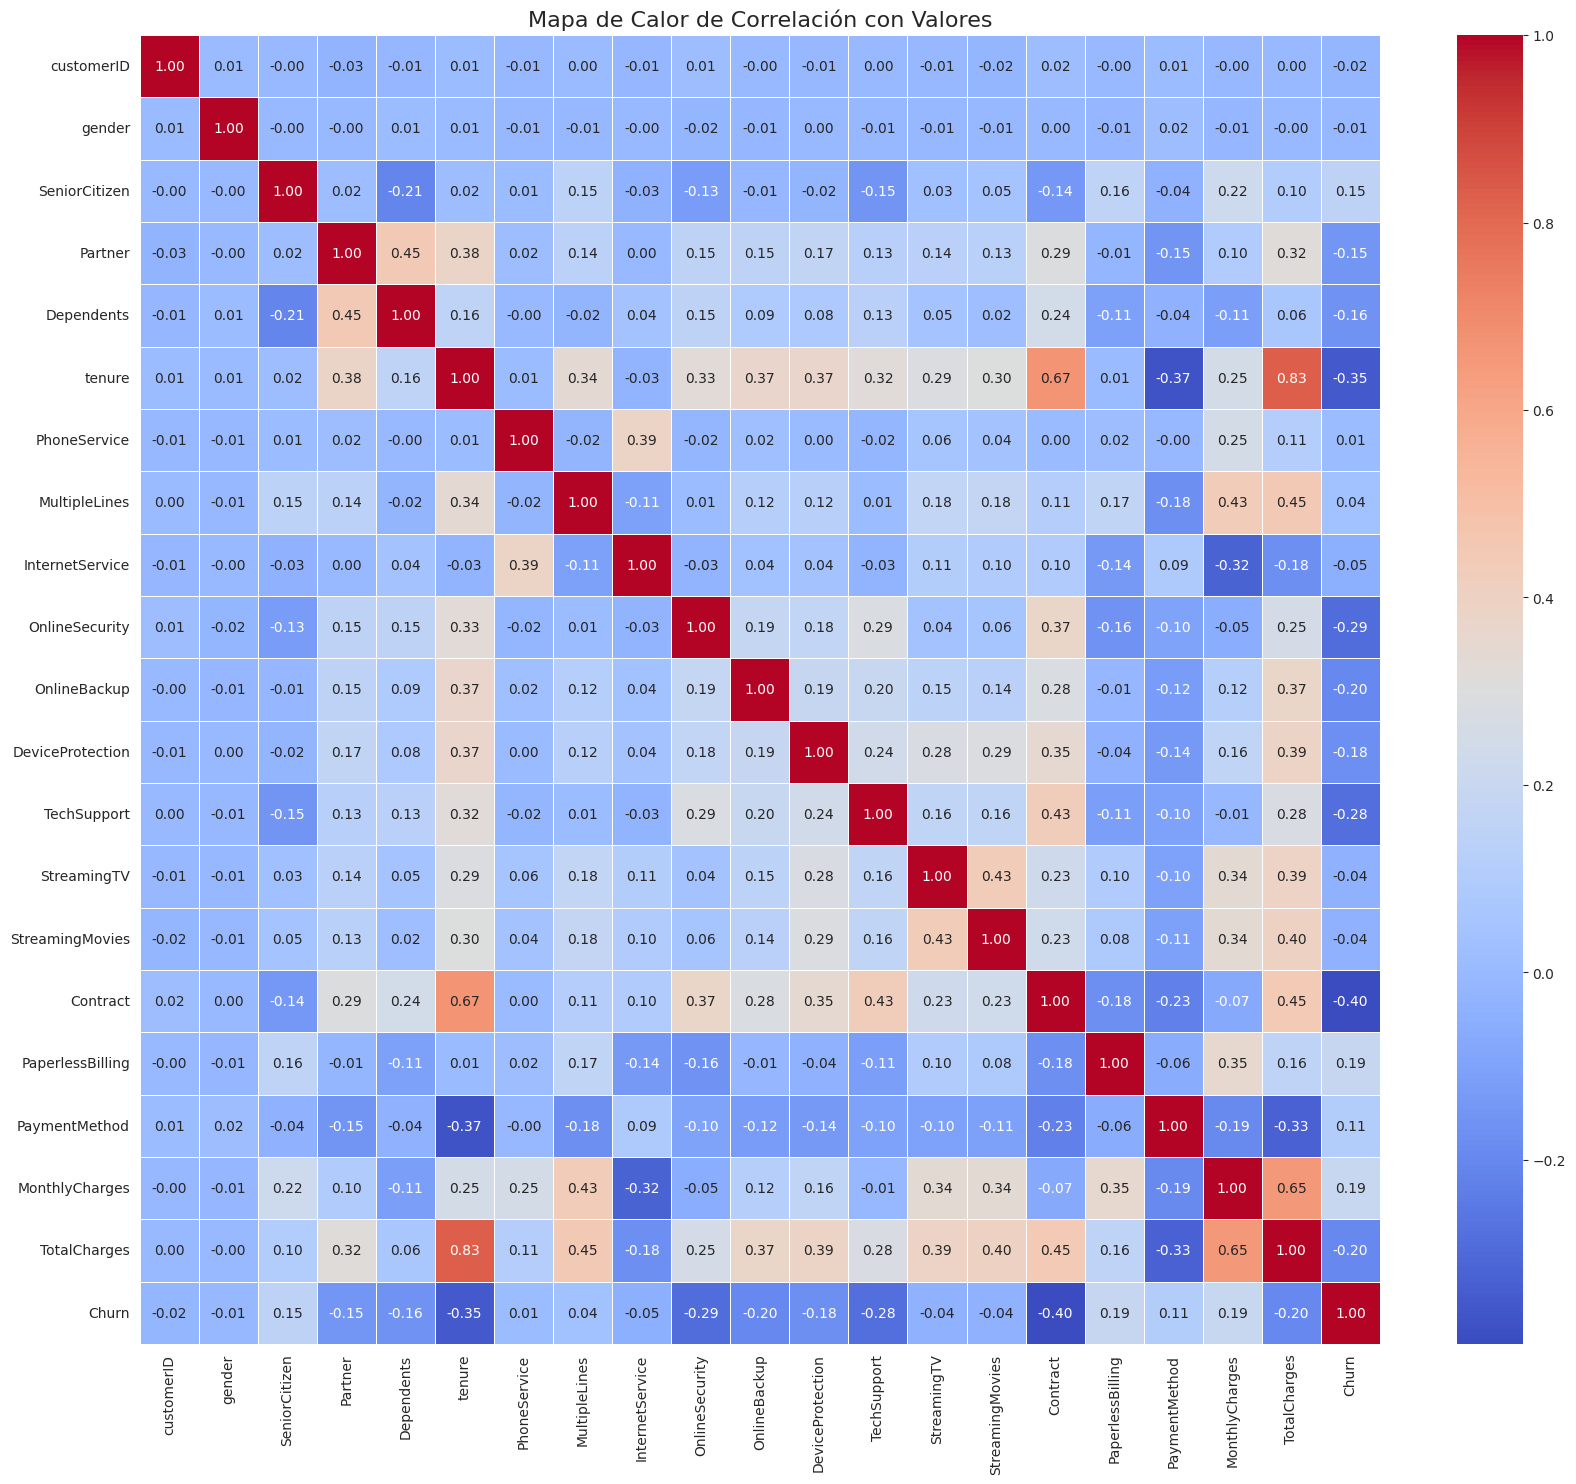

In [22]:
correlation_matrix_full = df_label_encoded.corr()

plt.figure(figsize=(20, 17))

sns.heatmap(correlation_matrix_full, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)


plt.title('Mapa de Calor de Correlación con Valores', fontsize=16)

# **3) Entrega mediante Github**

Un archivo .ipynb claramente comentado con todo el código utilizado para la limpieza y exploración de datos. Para cumplir con los requisitos anteriores, este archivo tendrá un mínimo de 4 visualizaciones.

Subir un repositorio a una plataforma de control de versiones (por ejemplo, GitHub) con un TAG incluido para verificar la fecha de entrega. El repositorio debe contener el archivo .ipynb.

**NOTA:** Debes enviar un archivo y un enlace al repositorio con el TAG correspondiente. Las presentaciones de enlaces sin el archivo o sin el TAG serán consideradas no presentadas.